In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from torch import linalg


In [51]:
def confidence_ellipse(x, y, ax, sigma, mu, w, n_std=1.5, facecolor='none', **kwargs):
    pearson = sigma[0][1]/np.sqrt(sigma[0][0] * sigma[1][1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(sigma[0][0]) * n_std
    mean_x = mu[0]

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(sigma[1][1]) * n_std
    mean_y = mu[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

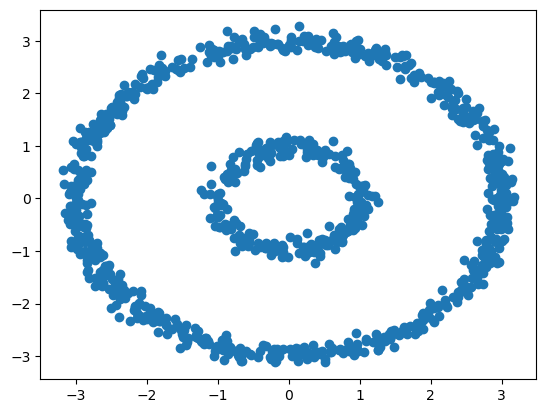

In [52]:
def rings_sample(N, D, sigma=0.1, radia=np.array([3, 1])):
    assert D >= 2
    
    angles = np.random.rand(N) * 2 * np.pi
    noise = np.random.randn(N) * sigma
    
    weights = 2 * np.pi * radia
    weights /= np.sum(weights)
    
    radia_inds = np.random.choice(len(radia), N, p=weights)
    radius_samples = radia[radia_inds] + noise
    
    xs = (radius_samples) * np.sin(angles)
    ys = (radius_samples) * np.cos(angles)
    X = np.vstack((xs, ys)).T.reshape(N, 2)
    
    result = np.zeros((N, D))
    result[:, :2] = X
    if D > 2:
        result[:, 2:] = np.random.randn(N, D - 2) * sigma
    return result

features = rings_sample(1000, 2)
plt.scatter(features[:,0], features[:,1])

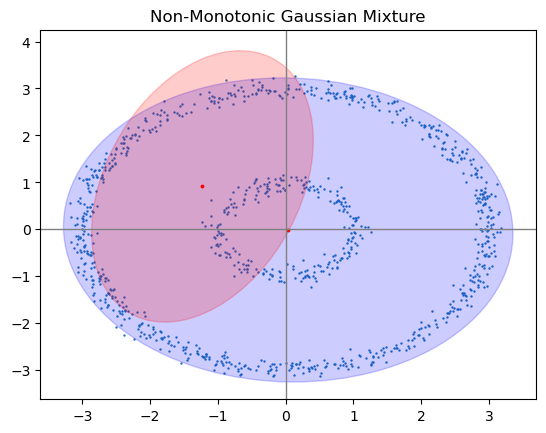

In [53]:
mu_0 = [0.0375, -0.0134]
mu_1 = [-1.2283,  0.9137]

sigma_0 = [[ 4.8885, -0.1158], [-0.1158,  4.6642]]
sigma_1 = [[1.1888, 0.7145], [0.7145, 3.7163]]

w_0 = 4.3450
w_1 = -2.519

scale = 1, 1

fig, ax = plt.subplots()
x, y = features[:,0], features[:,1]
ax.scatter(x, y, s=0.5)

ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)

confidence_ellipse(x, y, ax, sigma_0, mu_0, w_0, edgecolor='blue', facecolor='blue', alpha=.2)
confidence_ellipse(x, y, ax, sigma_1, mu_1, w_1, edgecolor='red', facecolor='red', alpha=.2)

ax.scatter(mu_0[0], mu_0[1], c='red', s=3)
ax.scatter(mu_1[0], mu_1[1], c='red', s=3)
ax.set_title('Non-Monotonic Gaussian Mixture')

plt.show()